In [ ]:
#Import

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Load the data
data = pd.read_csv('https://raw.githubusercontent.com/renatomaaliw3/public_files/refs/heads/master/Data%20Sets/business.csv')
data.head()

,BusinessID,BusinessName,Category,Location,Revenue,Employees,CustomerSatisfaction,YearEstablished
0,BUS0001,Business_1,Education,New York,186097.41,447,3.2,2022
1,BUS0002,Business_2,Retail,Miami,677201.80,300,4.3,1984
2,BUS0003,Business_3,Healthcare,Houston,259990.60,338,4.2,1982
3,BUS0004,Business_4,Healthcare,Seattle,335475.91,393,4.9,1988
4,BUS0005,Business_5,Finance,Chicago,107909.76,356,3.6,1991


In [ ]:
# Question 1: Which category has the highest average revenue for business established in 2022?
df = pd.DataFrame(data)

df_2022 = df[df["YearEstablished"] == 2022]

average_revenue_by_category = df_2022.groupby("Category")["Revenue"].mean()

highest_avg_revenue_category = average_revenue_by_category.idxmax()

print("Category with the highest average revenue for businesses established in 2022:", highest_avg_revenue_category)

Category with the highest average revenue for businesses established in 2022: Technology


In [ ]:
# Question 2: Which location has the most employees on average for Retail business established after 2000?
retail_after_2000 = df[(df["Category"] == "Retail") & (df["YearEstablished"] > 2000)]

average_employees_by_location = retail_after_2000.groupby("Location")["Employees"].mean()

location_with_most_employees = average_employees_by_location.idxmax()

print("Location with the most employees on average for Retail businesses established after 2000:", location_with_most_employees)


Location with the most employees on average for Retail businesses established after 2000: Miami


In [ ]:
# Question 3: Which is the most common customer satisfaction rating among business with revenue above $500,000?
high_revenue_businesses = df[df["Revenue"] > 500000]

most_common_rating = high_revenue_businesses["CustomerSatisfaction"].mode().iloc[0]

print("The most common customer satisfaction rating among businesses with revenue above $500,000:", most_common_rating)


The most common customer satisfaction rating among businesses with revenue above $500,000: 3.2


In [ ]:
# Question 4: What is the total revenue generated by Finance businesses established between 1990 and 2000 in Miami?
# Filter Finance businesses established between 1990 and 2000 in Miami
finance_miami = df[
    (df["Category"] == "Finance") &
    (df["YearEstablished"] >= 1990) &
    (df["YearEstablished"] <= 2000) &
    (df["Location"] == "Miami")
]

total_revenue = finance_miami["Revenue"].sum()
total_revenue


2893570.95

In [ ]:
# Question 5:

# identify the location _____ that has the highest median revenue per employee for businesses
# established between 2000 and 2010. Exclude businesses with fewer than 20 employees or more than 300 employees from this analysis.

# Hint: you need to create a new column 'RevenuePerEmployee' based on Revenue / Employee to arrived with the correct answer
# Filter dataset for business established between 2000 and 2010

df['RevenuePerEmployee'] = df['Revenue'] / df['Employees']

filtered_df = df[
    (df["YearEstablished"] >= 2000) &
    (df["YearEstablished"] <= 2010) &
    (df["Employees"] >= 20) &
    (df["Employees"] <= 300)
]

median_revenue_per_employee = filtered_df.groupby("Location")["RevenuePerEmployee"].median()

location_with_highest_median = median_revenue_per_employee.idxmax()

print("The location with the highest median revenue per employee for businesses established between 2000 and 2010:", location_with_highest_median)


The location with the highest median revenue per employee for businesses established between 2000 and 2010: Miami


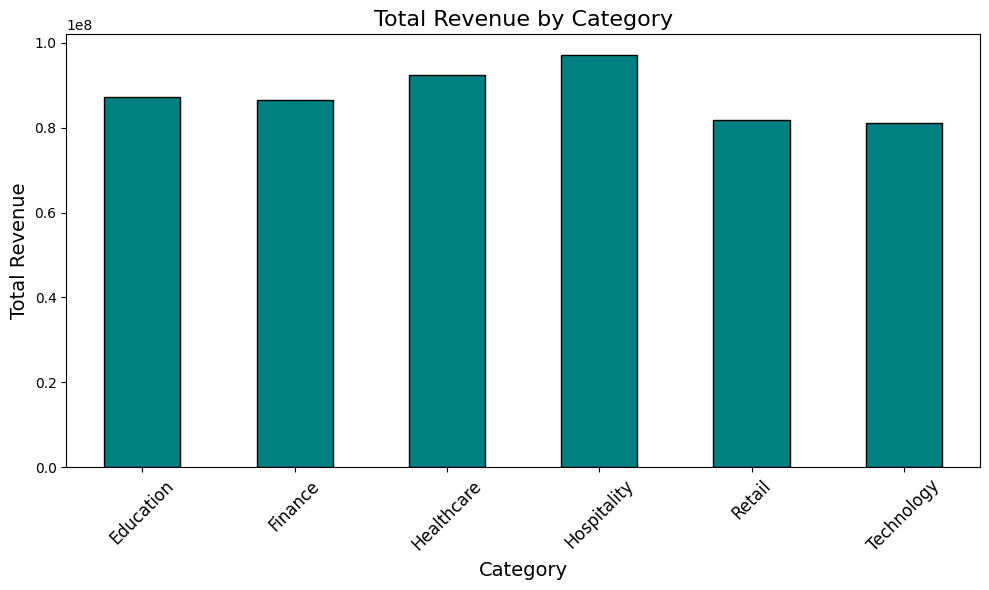

In [ ]:
# Question 06:
# Create a bar chart, with x - axis as Category and y-axis as Total Revenue (per Category)
# Compare Hospitality and Technology, give me you interpretations/s

total_revenue_by_category = df.groupby("Category")["Revenue"].sum()

plt.figure(figsize=(10, 6))
total_revenue_by_category.plot(kind='bar', color='teal', edgecolor='black')

plt.title("Total Revenue by Category", fontsize=16)
plt.xlabel("Category", fontsize=14)
plt.ylabel("Total Revenue", fontsize=14)

plt.xticks(rotation=45, fontsize=12)

plt.tight_layout()
plt.show()

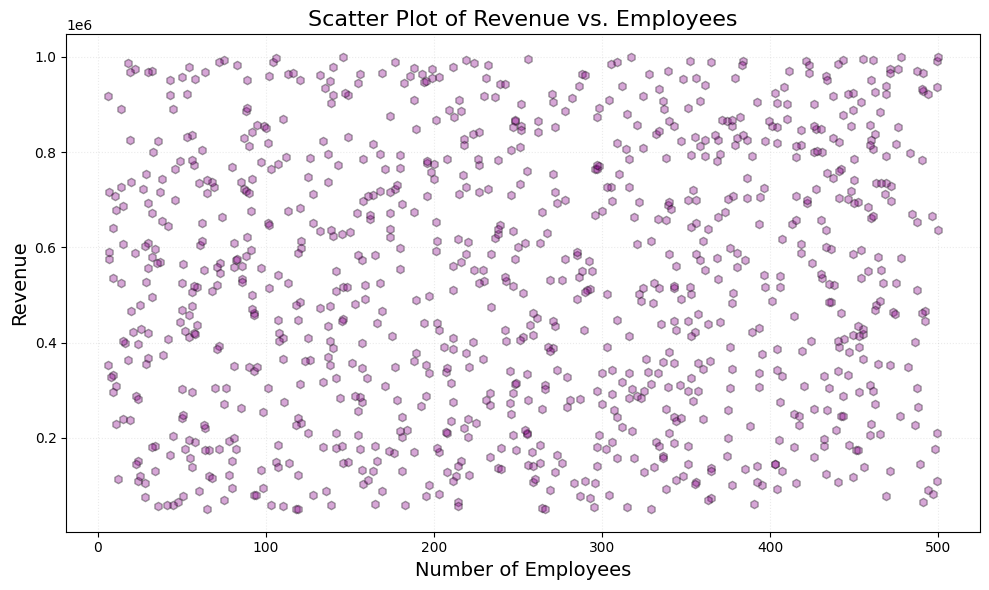

In [ ]:
# Questioin 7: Create a scatter plot between Employee and Revenue
# Give me your intepretations/s
plt.figure(figsize=(10, 6))
plt.scatter(df["Employees"], df["Revenue"], color="darkmagenta", alpha=0.35, edgecolor="black", marker="h")

plt.title("Scatter Plot of Revenue vs. Employees", fontsize=16)
plt.xlabel("Number of Employees", fontsize=14)
plt.ylabel("Revenue", fontsize=14)

plt.grid(True, alpha=0.25, linestyle="dotted")

plt.tight_layout()
plt.show()


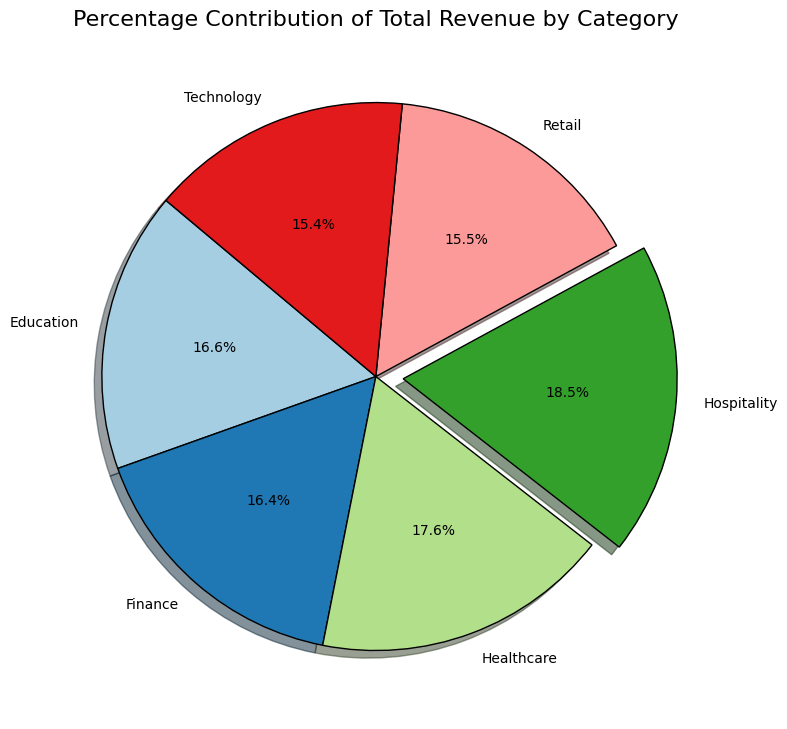

The percentage contribution of Hospitality: 18.46%


In [ ]:
# Question 8:
# Using a pie chart, plot the percentage contribution of Total Revenue per Category
# What is the percentage contribution of Hospitality?

total_revenue_by_category = df.groupby("Category")["Revenue"].sum()

hospitality_contribution = (total_revenue_by_category["Hospitality"] / total_revenue_by_category.sum()) * 100

explode = [0.1 if category == "Hospitality" else 0 for category in total_revenue_by_category.index]

plt.figure(figsize=(8, 8))
plt.pie(
    total_revenue_by_category,
    labels=total_revenue_by_category.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Paired.colors,
    explode=explode,
    shadow=True,
    wedgeprops={'edgecolor': 'black'}
)

plt.title("Percentage Contribution of Total Revenue by Category", fontsize=16)

plt.tight_layout()
plt.show()

print(f"The percentage contribution of Hospitality: {hospitality_contribution:.2f}%")

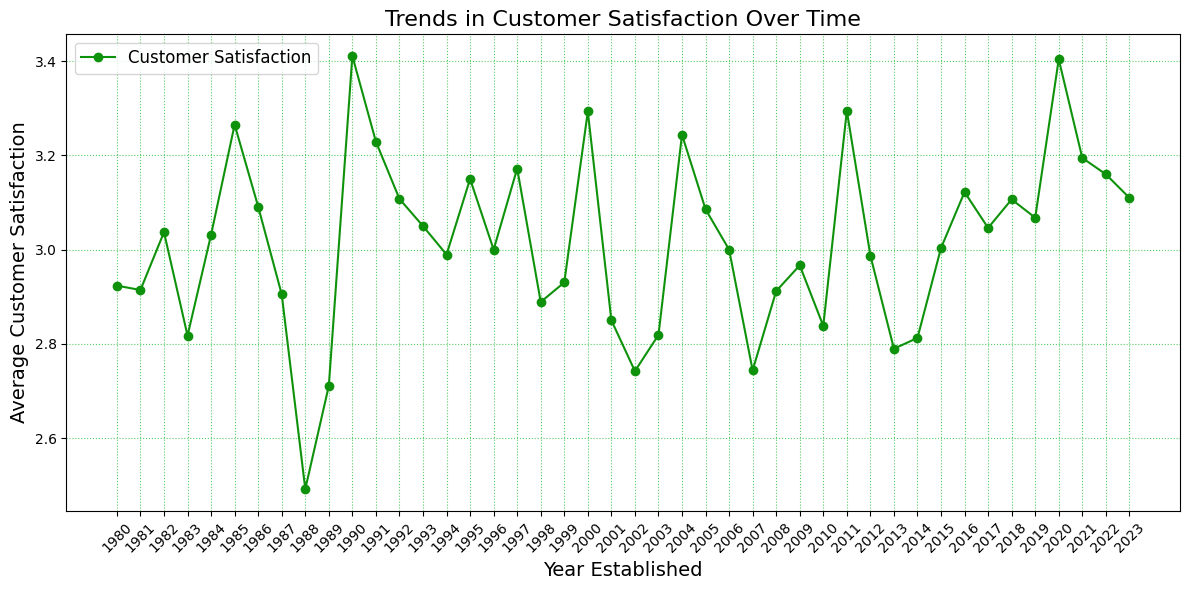

In [ ]:
# Question 9:
# Create a line graph with x-axis as Year establshed, y-axis as the Average CustomerSatisfaction
# Hint: You need groupby statement, Remember when you are aggregating the aggregate becomes the index and not a column anymore
# Give me your interpretation/s

avg_customer_satisfaction = df.groupby("YearEstablished")["CustomerSatisfaction"].mean()

plt.figure(figsize=(12, 6))
plt.plot(avg_customer_satisfaction.index, avg_customer_satisfaction.values, marker='o', color='#0f920b', label='Customer Satisfaction')

plt.title("Trends in Customer Satisfaction Over Time", fontsize=16)
plt.xlabel("Year Established", fontsize=14)
plt.ylabel("Average Customer Satisfaction", fontsize=14)

plt.xticks(ticks=avg_customer_satisfaction.index, rotation=45, fontsize=10)
plt.yticks(fontsize=10)

plt.legend(loc="best", fontsize=12)

plt.grid(True, alpha=0.7, linestyle="dotted", color = '#0fb724')

plt.tight_layout()
plt.show()



In [ ]:
# Question 10:
# If you used (correlation) .corr() function on the original dataset's numerical columns, what is your interpretation/s?
numerical_columns = ['YearEstablished', 'Revenue', 'CustomerSatisfaction']

correlation_matrix = data[numerical_columns].corr()

correlation_matrix



,YearEstablished,Revenue,CustomerSatisfaction
YearEstablished,1.000000,-0.017223,0.031857
Revenue,-0.017223,1.000000,-0.069837
CustomerSatisfaction,0.031857,-0.069837,1.000000
